#  Assignment 4: 

## Purpose:
- To provide requisite experience with linear regression
- To introduce simulation as a means of studying the behavior of statistical techniques

- Basically,this assignment is about simulations. And we are using it to study the bahavior of statistical techniques. Most of the exercises are going to be done repeatedly.The essence is to see if we can estimate that reliability by running the simulation 1000 times, and examine the distribution of the error of its parameter estimates to see if it is unbiased, and how broad the errors are and to see if the results we get are close to the analytical values.

## Data

The data for this assignment was generated using Numpy's random number generator using a seedbank with a defined seed(in my case i used a date, the date i started the assignment) to make sure that my results will remain consistent with my conclusions.


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

Initialising the seedbank..

In [2]:
import seedbank
seedbank.initialize(20211015)# using the date i started the assignment as the seed

SeedSequence(
    entropy=20211015,
)

Lets generate the random number

In [3]:
rng= seedbank.numpy_rng()
rng

Generator(PCG64) at 0x7FCBB6DA89E0

Let's get started by drawing samples from a normal distribution with mean of 0 and standard deviation of 1:

## ..taking 100 draws for 1000 iterations from standard normal twice {xy∼Normal(0,1)∼Normal(0,1)}

In [4]:
# 100 draws to test for correlation b/w ys and xs
#by calculating the corelation coefficient
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=1000
c_simu_corr=np.empty(ITE_COUNT)

for i in range(ITE_COUNT):
    xs = pd.Series(rng.standard_normal(100))
    ys = pd.Series(rng.standard_normal(100))
    c_simu_corr[i]= xs.corr(ys)
    

..

**Calculating the mean and variance of the coefficients:**

In [5]:
#Calculating the mean of the coefficients
mean_corr=c_simu_corr.mean()
print('The mean is:')
mean_corr

The mean is:


-0.005965682742449431

In [6]:
var_corr=c_simu_corr.var()# calculating the variance
print('The variance is:')
var_corr

The variance is:


0.010495565316736146

The mean and variance gotten from this computation are close to the known mean and variance.The variance $\sigma^2/n\$ seems to be close to the actual value.However, lets see how it fares when we increase the n by increasing the number of runs

**Plotting the distribution:**

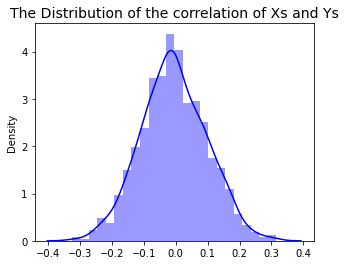

In [7]:
plt.figure(figsize=(5,4))
sns.distplot(c_simu_corr,color='b')
plt.title('The Distribution of the correlation of Xs and Ys',fontsize=14)
plt.show()

The distribution looks normal which is not a surprise as it is comfirming the law of central limit theorem.

### Running 1000 iterations of this simulation to compute 1000 correlation coefficients:

In [8]:
rng= seedbank.numpy_rng() # generating the random number and initializing the seedbank
seedbank.initialize(20211015)
ITE_COUNT_1=1000 # the number of iterations
c_simu_corr_1=np.empty(ITE_COUNT) #initializing the variable to hold the correlation result

for i in range(ITE_COUNT):
    xs = pd.Series(rng.standard_normal(1000)) #increasing the number of xs and ys
    ys = pd.Series(rng.standard_normal(1000)) 
    c_simu_corr_1[i]= xs.corr(ys)# computing the correlation again

In [9]:
mean_corr_1=c_simu_corr_1.mean() # calculating the mean of the correlation coefficients
print('The mean of this correlation coefficient is:')
mean_corr_1

The mean of this correlation coefficient is:


-0.00015013624917215208

In [10]:
var_corr_1=c_simu_corr_1.var()# Computing the variance of the correlation coefficients
print('The variance of this correlation coefficient is:')
var_corr_1

The variance of this correlation coefficient is:


0.0009544466175212485

We can see here that the mean is going closer and closer to zero and the variance is reducing as the n in $\sigma^2/n\$ increases

Let us see how the distribution looks by doing a histogram:

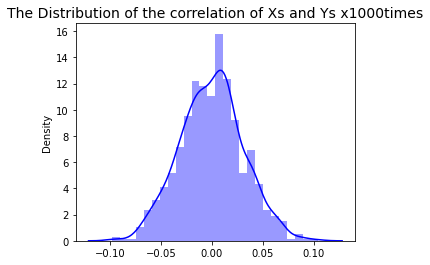

In [11]:
plt.figure(figsize=(5,4))
sns.distplot(c_simu_corr_1,color='b')
plt.title('The Distribution of the correlation of Xs and Ys x1000times',fontsize=14)
plt.show()


The results are what i expected: the mean for the 100 tends closer to zero as,and that of 1000 draws as well moved even more closer to zero than that of 100 showing the reliability of the central limit theorem.

 ### Drawing and running 100 samples for covariance where zs= xs+ys:
Here, we are trying to subject the drawn samples of independent xs and ys and take their covariance, which from the analytical calculations is zero and their correlation is 0.707. Lets see if the results from our experiment will produce values that are closer to the actual values.

In [12]:
rng= seedbank.numpy_rng()# set the seedbank and initialize it
seedbank.initialize(20211015)
ITE_COUNT_2=1000
c_simu_corr_2=np.empty(ITE_COUNT_2)
cov_zs=np.empty(ITE_COUNT_2)

for i in range(ITE_COUNT_2):
    xs1 = pd.Series(rng.standard_normal(100))# drawing 100 samples of xs and ys
    ys1 = pd.Series(rng.standard_normal(100))
    zs = xs1+ys1
    c_simu_corr_2[i]= xs1.corr(zs) #calculating the correlation
    cov_zs[i]= xs1.cov(zs)# Calculating the covariance
    
#print(c_simu_corr_2)
     

Lets calculate the mean and the variance of the coefficient and see what we might get:

In [13]:
mean_corr_2=c_simu_corr_2.mean()# calculating the mean of the coefficients
print('The mean is ')
mean_corr_2


The mean is 


0.7083439328988637

In [14]:
var_corr_2=c_simu_corr_2.var()
print('The variance is ')
var_corr_2

The variance is 


0.0027405292183770164

The mean of the correlation coefficients of the zs is 0.708 and the variance is 0.00274 which are what we expect from the experiment, confirmong the the analytically calculated values

**Plotting the distribution..**

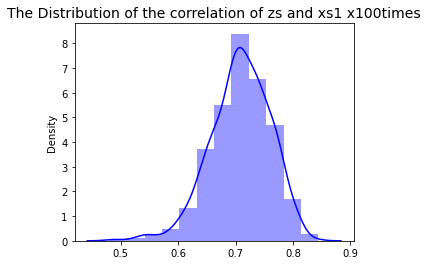

In [15]:
plt.figure(figsize=(5,4))
sns.distplot(c_simu_corr_2,color='b',bins=12)
plt.title('The Distribution of the correlation of zs and xs1 x100times',fontsize=14)
plt.show()

This plot looks slightly normal and  shows positive correlation between the coefficients zs and xs1 as the mean of the coefficient is close to the analytical/theoritical value of 0.707.

In [16]:
mean_cov_zs=cov_zs.mean()# caomputing the mean of the covariance
print('The mean of the covariance is ')
mean_cov_zs

The mean of the covariance is 


1.0084769210622022

In [17]:
#computing the variance of the covariance
var_cov_zs=cov_zs.var()
var_cov_zs

0.0307162738007131

The mean of the covariance between x and z from our experiment is 1.008..which confirms the analytical values we got before the experiment, the mean of x and z is 1 analytically. Same with the variance too

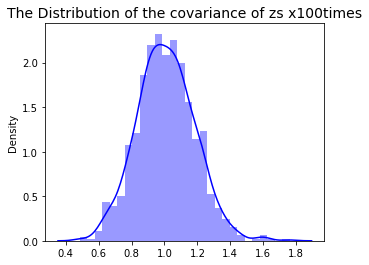

In [18]:
plt.figure(figsize=(5,4))
sns.distplot(cov_zs,color='b')
plt.title('The Distribution of the covariance of zs x100times',fontsize=14)
plt.show()

This plot looks pretty normal.So,the mean of the covariance is 1 as shown in this plot which is same as the analytical computation and shows a positive relationship.

### Drawing 1000 and running 1000 samples for zs:
increasing the number of samples to 1000 to see if there is gonna be any changes to the statistics we are computing against the analytical values.

In [19]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT_2=1000
c_simu_corr_3=np.empty(ITE_COUNT_2)
cov_zs_1=np.empty(ITE_COUNT_2)

for i in range(ITE_COUNT_2):
    xs = pd.Series(rng.standard_normal(1000))
    ys = pd.Series(rng.standard_normal(1000))
    zs = xs+ys
    c_simu_corr_3[i]= xs.corr(zs)
    cov_zs_1[i]= xs.cov(zs)
    
#print(c_simu_corr_3)
     

Lets calculate the mean and the variance of the coefficient zs and see if it is what we expect from the experiment.

In [20]:
mean_corr_3=c_simu_corr_3.mean()# compute the mean for the zs coefficients
print('The mean of the coefficients of zs variable is')
mean_corr_3

The mean of the coefficients of zs variable is


0.7068662951681549

In [21]:
var_corr_3= c_simu_corr_3.var()# compute the variance
print('The variance of the zs variable is:')
var_corr_3

The variance of the zs variable is:


0.0002480193424102904

The mean is still close to the previous value 0.708, which is what we expect from the experiment.The variance too is close to what we got analytically.

**Plotting the distribution of zs:**

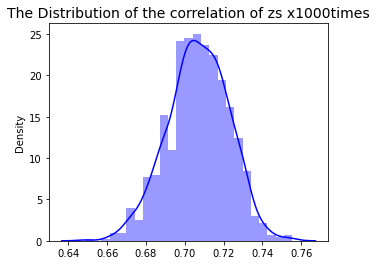

In [22]:
plt.figure(figsize=(5,4))
sns.distplot(c_simu_corr_3,color='b')
plt.title('The Distribution of the correlation of zs x1000times',fontsize=14)
plt.show()

This looks slightly normal.
The mean in this 1000 draws is almost same with the 100 draws-0.71 aprrox which is what we expected as it shows a strong relationship between the coefficients of variable and confirms the analytical computation.

Lets compute the mean and the variance to see if they tally with our expectations:

In [23]:
mean_cov_zs_1=cov_zs_1.mean()#computing the mean
mean_cov_zs_1

0.9985603697536035

In [24]:
var_cov_zs_1=cov_zs_1.var()# Computing the variance
var_cov_zs_1

0.0031246464859854967

The mean here is showing 0.998 which is approx 1, the analytical mean. The variance is drawing more closer to zero in line with our expectations even though the number of samples are increased, it still maintains the results changing only very slightly but approximatly equal to the analytical values.

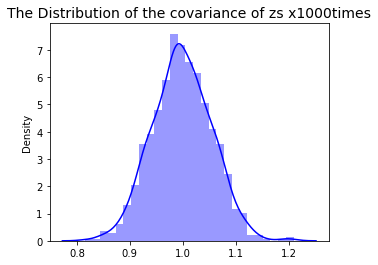

In [25]:
plt.figure(figsize=(5,4))
sns.distplot(cov_zs_1,color='b')
plt.title('The Distribution of the covariance of zs x1000times',fontsize=14)
plt.show()

The plot looks normal in line with our expectations.
The mean of the covariance here in this increased draw is approx 1 as in the 100 draw, which same as the analytical computation tending to 1.

### Running the 10000 draws:

In [26]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT_2=1000
c_simu_corr_4=np.empty(ITE_COUNT_2)
cov_zs_2=np.empty(ITE_COUNT_2)

for i in range(ITE_COUNT_2):
    xs = pd.Series(rng.standard_normal(10000))
    ys = pd.Series(rng.standard_normal(10000))
    zs = xs+ys
    c_simu_corr_4[i]= xs.corr(zs)
    cov_zs_2[i]= xs.cov(zs)
    
#print(c_simu_corr_4)
     

After this 10000 draws, is there any observable shifts from the analytical values? Let us see below:

In [27]:
mean_corr_4=c_simu_corr_4.mean()# computing the mean
mean_corr_4

0.707315969324733

In [28]:
var_corr_4=c_simu_corr_4.var()# computing the variance
var_corr_4

2.429298846658706e-05

It is evident yet again that the mean is pretty much same thing it was in the last run while the variance keeps going closer to zero more and more due to the influence of the increase in n from the variance formula: $\sigma^2/n\$: the more n is increasing the more closer to zero the variance will become, still very much in agreement with our expectation

**Let's plot the distribution and see what it looks like:**

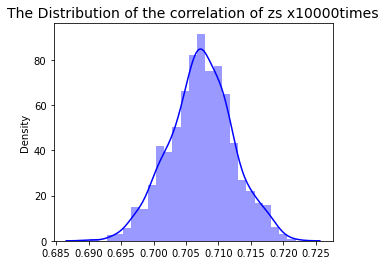

In [29]:
plt.figure(figsize=(5,4))
sns.distplot(c_simu_corr_4,color='b')
plt.title('The Distribution of the correlation of zs x10000times',fontsize=14)
plt.show()

This plot looks pretty normal.The mean of the correllation coefficients continued tending closer to 0.707 as in the previous draws which is what we expected.

Let's calculate the mean and variance of the covariance and see if there's any change at this level of runs:

In [30]:
mean_cov_zs_2=cov_zs_2.mean()#Computing the mean of the covariance
mean_cov_zs_2

1.0009273182829228

In [31]:
var_cov_zs_2=cov_zs_2.var()# computing the variance of the covariance
var_cov_zs_2

0.0003035380823040241

The mean of the covariance is still approx. 1 as usual which is what we expect and been  having from the 100 sample till this 10000 runs, and this goes to prove the statistical techniques behind these computations-central limit theorem.

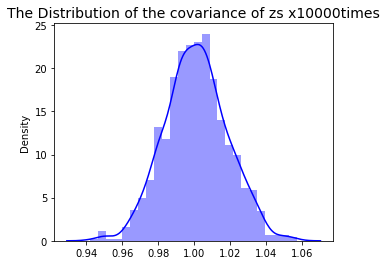

In [32]:
plt.figure(figsize=(5,4))
sns.distplot(cov_zs_2,color='b')
plt.title('The Distribution of the covariance of zs x10000times',fontsize=14)
plt.show()

This plot looks normal in line with our expectations.
The covariance is 1 as in the previous cases which is what we expected too.

## Linear Regression:
In this section, we are going to subject our  generate data to follow linear regression and see if the results of our experiment will yield to the dictates of our analytical values. This we will do by doing several runs to see if the results will continue to prove our expectations right.

First, we will be drawing our xs from a normal distribution and ys from $0+1*xs+ errs\$;

In [33]:
rng= seedbank.numpy_rng()
seedbank.initialize(20201014)
xs = rng.standard_normal(1000)
errs = rng.standard_normal(1000)
ys = 0 + 1 * xs + errs
data = pd.DataFrame({ #converting to dataframe
    'X': xs,
    'Y': ys
})
data

,X,Y
0,0.044972,0.474827
1,0.712169,1.126456
2,0.412427,1.715456
3,-0.124165,-1.726882
4,-1.222970,-2.032290
...,...,...
995,0.746696,-0.643341
996,0.105184,2.921162
997,0.909912,1.819674
998,0.120652,0.384708


Let's fit the model

In [34]:
lm_XY= smf.ols('Y~ X', data=data) #setting the model
lm_XY

In [35]:
fitted_lm=lm_XY.fit()# fitting the summary

In [36]:
fitted_lm.summary()# displaying the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          2.74e-158
Time:                        23:55:20   Log-Likelihood:                -1402.2
No. Observations:                1000   AIC:                             2808.
Df Residuals:                     998   BIC:                             2818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.031      0.247      0.805      -0.053       0.069
X              0.9951      0.031     32.451      0.000       0.935       1.055
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.845
Skew:                           0.099   Prob(JB):                        0.398
Kurtosis:                       2.928   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is 0.0077, slope is 0.9951 and the R-Squared is  0.513 which are all approx to the analytically calculated values; the result is what we expected because of  we know the population parameters.

### checking the Assumptions

In [37]:
def plot_lm_diag(fit):
    "Plot linear fit diagnostics"
    sns.regplot(x=fit.fittedvalues, y=fit.resid)
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()

    sm.qqplot(fit.resid, fit=True, line='45')
    plt.title('Residuals')
    plt.show()

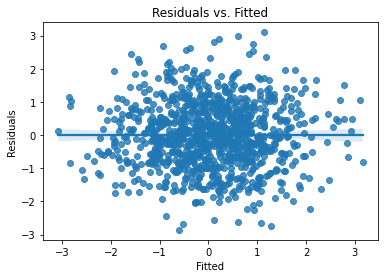

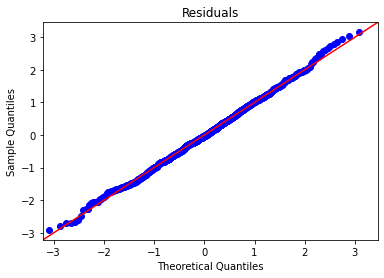

In [38]:
plot_lm_diag(fitted_lm)

The assumption holds. From the QQplot the points are in line. while in the Residuals vs Fitted plot, it is homoskedastic.

Let us repeat the operation for 1000 iterations and see:

In [39]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=1000
R_sq=np.empty(ITE_COUNT)
intercept=np.empty(ITE_COUNT)
slope=np.empty(ITE_COUNT)
for i in range(ITE_COUNT):
        xs = rng.standard_normal(1000)
        errs = rng.standard_normal(1000)
        ys = 0 + 1 * xs + errs
        data = pd.DataFrame({
        'X': xs,
        'Y': ys
        })
        lm_XY= smf.ols('Y~ X', data=data)     
        fitted_lm=lm_XY.fit()
        R_sq[i]=fitted_lm.rsquared
        intercept[i]=fitted_lm.params['Intercept']
        slope[i]=fitted_lm.params['X']


In [40]:
mean_RSq=R_sq.mean()
var_RSq= R_sq.var()
print('The mean of RSquared is:')
print(mean_RSq)
print('The variance  of Rsquared is: ')
print(var_RSq)

The mean of RSquared is:
0.5006857303835843
The variance  of Rsquared is: 
0.0004701021806409831


In [41]:
mean_Int=intercept.mean()
var_Int= intercept.var()
print('The mean of Intercept is:')
print(mean_Int)
print('The variance of Intercept is: ')
print(var_Int)

The mean of Intercept is:
-0.0009283604323816445
The variance of Intercept is: 
0.0010225615099720127


In [42]:
mean_slop=slope.mean()
var_slop= slope.var()
print('The mean of the slope is:')
print(mean_slop)
print('The variance of the slope is: ')
print(var_slop)

The mean of the slope is:
1.000646359936704
The variance of the slope is: 
0.0009894877978330848


The results shown above are the results we expect from the experiment because they tallied with the coeficients of the analytical values.

### The distributions of Rsquared,Slope and intercept:

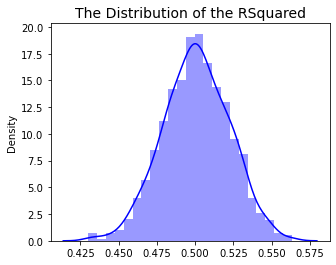

In [43]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the RSquared',fontsize='14')
sns.distplot(R_sq,color='b')
plt.show()

The distribution looks normally distributed

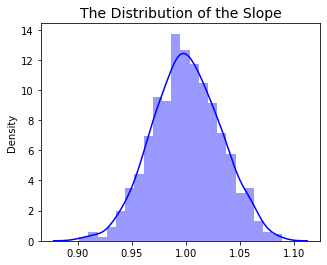

In [44]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the Slope',fontsize='14')
sns.distplot(slope,color='b')
plt.show()

The distribution looks normally distributed

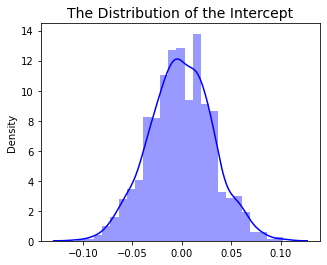

In [45]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the Intercept',fontsize='14')
sns.distplot(intercept,color='b')
plt.show()

The distribution looks normally distributed

Now, the model/equation is changed with the intercept from 0 to 1 and the slope from 1 to 4:

In [46]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
xs_1 = rng.standard_normal(1000)
errs_1 = rng.standard_normal(1000)
ys_1 = 1 + 4 * xs_1 + errs_1
data1 = pd.DataFrame({
    'X': xs_1,
    'Y': ys_1
})
data1

,X,Y
0,0.044972,1.609741
1,0.712169,4.262963
2,0.412427,3.952738
3,-0.124165,-1.099378
4,-1.222970,-4.701201
...,...,...
995,0.746696,2.596748
996,0.105184,4.236714
997,0.909912,5.549411
998,0.120652,1.746666


Fitting the model:

In [47]:
lm_XY_1= smf.ols('Y~ X', data=data1)
lm_XY_1

In [48]:
fitted_lm_1=lm_XY_1.fit()

In [49]:
fitted_lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.697e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:55:28   Log-Likelihood:                -1402.2
No. Observations:                1000   AIC:                             2808.
Df Residuals:                     998   BIC:                             2818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0077      0.031     32.358      0.000       0.947       1.069
X              3.9951      0.031    130.284      0.000       3.935       4.055
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.845
Skew:                           0.099   Prob(JB):                        0.398
Kurtosis:                       2.928   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The resulting model parameters are expected. R-Squared however moved higher to 0.944. The change in the R-squared from 0.513 to 0.944 is as a result of the increase in SS_Total  due to the corresponding increase in slope and intercept according to this formula; $1-SS_{Res}/SS_{Total}$,which from the formula for R-Squared, the $SS_{Total}$ will increase making the fraction very small which when subtracted from 1 will result to a high R-Squared.

In [50]:
def plot_lm_diag(fit):
    "Plot linear fit diagnostics"
    sns.regplot(x=fit.fittedvalues, y=fit.resid)
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()

    sm.qqplot(fit.resid, fit=True, line='45')
    plt.title('Residuals')
    plt.show()

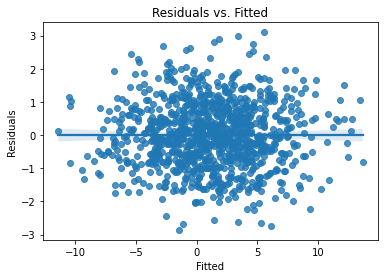

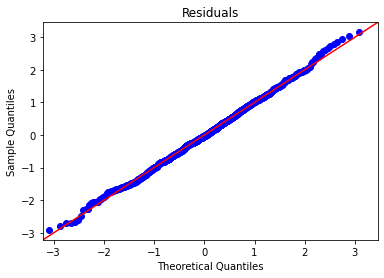

In [51]:
plot_lm_diag(fitted_lm_1)

The model assumptions here holds.The residuals vs Fitted plot has an even distribution of variance except for few places, and the QQplot the points all almost aligned

Repeating the same process 1000 times:

In [52]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=1000
R_sq1=np.empty(ITE_COUNT)
intercept1=np.empty(ITE_COUNT)
slope1=np.empty(ITE_COUNT)
for i in range(ITE_COUNT):
        xs1 = rng.standard_normal(1000)
        errs1 = rng.standard_normal(1000)
        ys1 = 1 + 4 * xs1 + errs1
        data1 = pd.DataFrame({
        'X': xs1,
        'Y': ys1
        })
        lm_XY_1= smf.ols('Y~ X', data=data1)     
        fitted_lm_1=lm_XY_1.fit()
        R_sq1[i]=fitted_lm_1.rsquared
        intercept1[i]=fitted_lm_1.params['Intercept']
        slope1[i]=fitted_lm_1.params['X']


In [53]:
mean_RSq1=R_sq1.mean()
var_RSq1= R_sq1.var()
print('The mean of RSquared is:')
print(mean_RSq1)
print('The variance  of Rsquared is: ')
print(var_RSq1)

The mean of RSquared is:
0.9411112860019155
The variance  of Rsquared is: 
1.3500810610225322e-05


The mean of the R-Squared is as expected 0.94,very close to the analytical value.The variance is close to zero.

In [54]:
mean_Int1=intercept1.mean()
var_Int1= intercept1.var()
print('The mean of Intercept is:')
print(mean_Int1)
print('The variance of Intercept is: ')
print(var_Int1)

The mean of Intercept is:
0.9981726865146773
The variance of Intercept is: 
0.0010397112098374502


The mean of the Intercept is as expected, 0.998, aprrox 1 as seen in the analytical value while the variance keeps going closer to zero

In [55]:
mean_slop1=slope1.mean()
var_slop1= slope1.var()
print('The mean of the slope is:')
print(mean_slop1)
print('The variance of the slope is: ')
print(var_slop1)

The mean of the slope is:
3.999849275660428
The variance of the slope is: 
0.0009531854754170801


The mean is approx 4 as expected.confirming the analytical results

Plotiing the distributions:

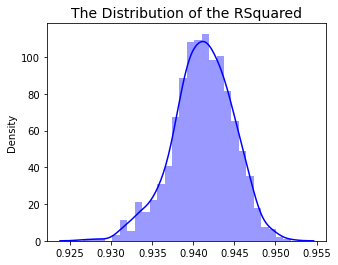

In [56]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the RSquared',fontsize='14')
sns.distplot(R_sq1,color='b')
plt.show()

This looks normally distributed.

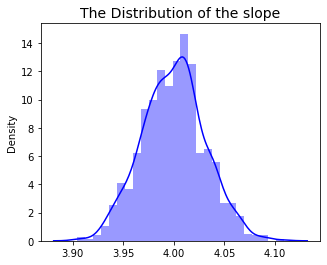

In [57]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the slope',fontsize='14')
sns.distplot(slope1,color='b')
plt.show()

This distribution looks normal as expected

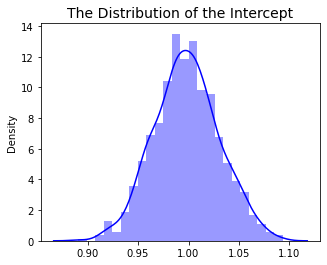

In [58]:
plt.figure(figsize=(5,4))
plt.title('The Distribution of the Intercept',fontsize='14')
sns.distplot(intercept1,color='b')
plt.show()

This distribution looks normal as expected

## Nonlinear Data :
Here, we are subjecting our generating our xs from a normal distribution while ys comes from an exponential equation. Let's see whether the results will align with our expectations.

In [59]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
xs2 = rng.standard_normal(1000)
errs2 = rng.normal(0,5,1000)
ys2 = 10 + 5 * np.exp(xs2) + errs2
data2 = pd.DataFrame({
    'X': xs2,
    'Y': ys2
})
data2

,X,Y
0,0.044972,17.379265
1,0.712169,22.263474
2,0.412427,24.067544
3,-0.124165,6.402584
4,-1.222970,7.425175
...,...,...
995,0.746696,13.599900
996,0.105184,29.634467
997,0.909912,26.969331
998,0.120652,16.961444


Fitting the model:

In [60]:
lm_nonlinear=smf.ols('Y~ X', data=data2)
lm_nonlinear

In [61]:
fitted_nonlinear=lm_nonlinear.fit()
fitted_nonlinear

In [62]:
fitted_nonlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     961.1
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          2.45e-148
Time:                        23:55:35   Log-Likelihood:                -3637.7
No. Observations:                1000   AIC:                             7279.
Df Residuals:                     998   BIC:                             7289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4720      0.291     63.434      0.000      17.901      19.043
X              8.8891      0.287     31.001      0.000       8.326       9.452
==============================================================================
Omnibus:                      741.963   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17517.568
Skew:                           3.148   Prob(JB):                         0.00
Kurtosis:                      22.513   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model doesnt fit well as expected because it is non linear; the scatter plot plotted later shows a non linear distribution.

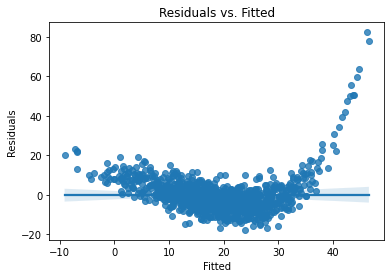

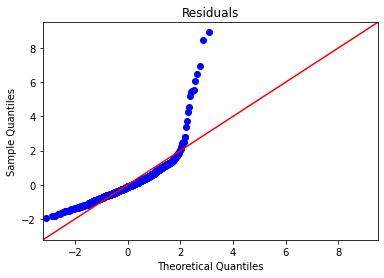

In [63]:
plot_lm_diag(fitted_nonlinear)

The assumptions for homoskedasticity holds for the residual vs Fitted plot; the normality assumption does not hold cause the QQplot shows that the line does not align but rather shows a curve.

<AxesSubplot:title={'center':'Scatter plot of X and Y'}, xlabel='X', ylabel='Y'>

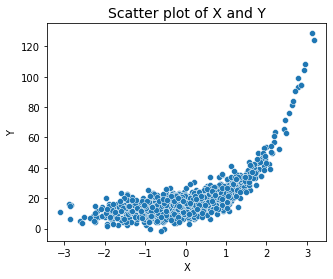

In [64]:
plt.figure(figsize=(5,4))
plt.title('Scatter plot of X and Y',fontsize='14')
sns.scatterplot(x='X',y='Y',data=data2)

..

This scatter plot shows strong exponential correlation between X and Y but weak or no linear correlation between X and Y. And this was as expected.

Exploring a different model:

In [65]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
xs3 = rng.standard_normal(1000)
errs3 = rng.standard_normal(1000)
ys3 = -2 + 3 * (xs3**3) + errs3
data3 = pd.DataFrame({
    'X': xs3,
    'Y': ys3
})
data3

,X,Y
0,0.044972,-1.569872
1,0.712169,-0.502109
2,0.412427,-0.486514
3,-0.124165,-3.608460
4,-1.222970,-8.296752
...,...,...
995,0.746696,-2.141064
996,0.105184,0.819470
997,0.909912,1.169821
998,0.120652,-1.730675


Let's fit the model:

In [66]:
lm_exp=smf.ols('Y~ X', data=data3)
lm_exp

In [67]:
lm_fitted_exp=lm_exp.fit()

In [68]:
lm_fitted_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1583.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          3.58e-208
Time:                        23:55:36   Log-Likelihood:                -3469.9
No. Observations:                1000   AIC:                             6944.
Df Residuals:                     998   BIC:                             6954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9343      0.246     -7.856      0.000      -2.417      -1.451
X              9.6476      0.242     39.793      0.000       9.172      10.123
==============================================================================
Omnibus:                      409.345   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17132.706
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                      23.147   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

..

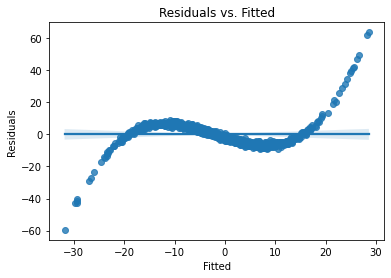

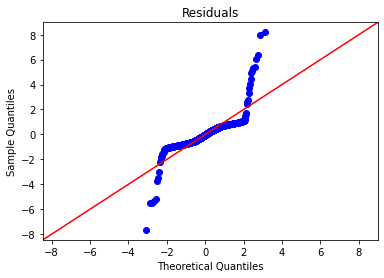

In [69]:
plot_lm_diag(lm_fitted_exp)

In this case, the assumptions for residual vs fitted plot holds as seen that there is a pattern for the noise distribution but the normality test does not hold as the line does not align in the QQplot.

<AxesSubplot:title={'center':'Scatter plot of X and Y'}, xlabel='X', ylabel='Y'>

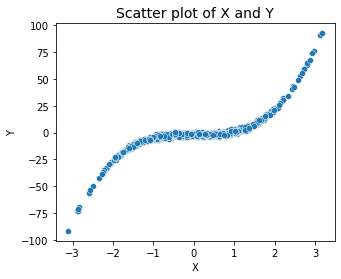

In [70]:
plt.figure(figsize=(5,4))
plt.title('Scatter plot of X and Y',fontsize='14')
sns.scatterplot(x='X',y='Y',data=data3)

The scatter plot clearly shows a nonlinear relationship

## Non-Normal Covariates:
Here, we are drawing our x from a gammar random generator, and y from a linear equation.
Let's see how the model parameters fit with our data.

In [71]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
xs4 = rng.gamma(2, 1, 1000)
errs4 = rng.standard_normal(1000)
ys4 = 10 + 0.3 * (xs4) + errs4
data4 = pd.DataFrame({
    'X': xs4,
    'Y': ys4
})
data4

,X,Y
0,1.725401,11.053123
1,2.257819,9.274812
2,0.533895,10.192838
3,2.014389,11.712311
4,0.809240,9.490066
...,...,...
995,0.740353,10.524355
996,0.681796,10.816768
997,1.061542,9.502921
998,1.011816,10.053708


<AxesSubplot:title={'center':'Distribution  of X'}, xlabel='X', ylabel='Density'>

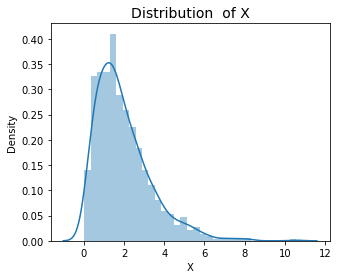

In [72]:

plt.figure(figsize=(5,4))
plt.title('Distribution  of X',fontsize= '14')
sns.distplot( data4['X'])

This distribution is right skewed

<AxesSubplot:title={'center':'Distribution  of Y'}, xlabel='Y', ylabel='Density'>

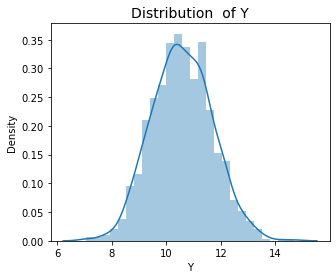

In [73]:
plt.figure(figsize=(5,4))
plt.title('Distribution  of Y',fontsize= '14')
sns.distplot(data4['Y'])

This plot looks normally distributed

In [74]:
lm_gamma=smf.ols('Y~ X', data=data4)
lm_gamma

In [75]:
fitted_gamma=lm_gamma.fit()

In [76]:
fitted_gamma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           9.10e-32
Time:                        23:55:37   Log-Likelihood:                -1449.1
No. Observations:                1000   AIC:                             2902.
Df Residuals:                     998   BIC:                             2912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0219      0.056    177.399      0.000       9.911      10.133
X              0.2865      0.024     12.148      0.000       0.240       0.333
==============================================================================
Omnibus:                        2.271   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.133
Skew:                           0.090   Prob(JB):                        0.344
Kurtosis:                       3.138   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### How well it fits: using Regplot

<AxesSubplot:title={'center':'Regplot of X and Y'}, xlabel='X', ylabel='Y'>

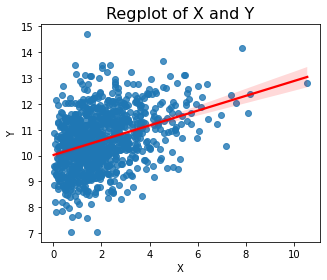

In [77]:
plt.figure(figsize=(5,4))
plt.title('Regplot of X and Y',fontsize='16')
sns.regplot(x="X",y="Y", data= data4,line_kws={'color':'red'})

From the above regplot, it is evident that the model does not fit well as the points are clustered at a point.And the R-quared is very low as it only explains 13% of the variations in the dependent variable which is also indicative of how poor the model fits.

### How much of the variance does it explain:

Looking at the R-squared, 0.129, approx 13% of the variations are explained.

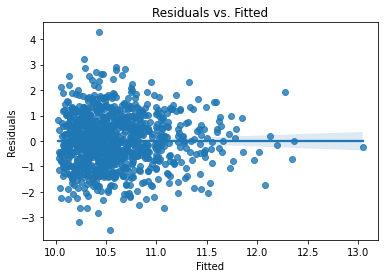

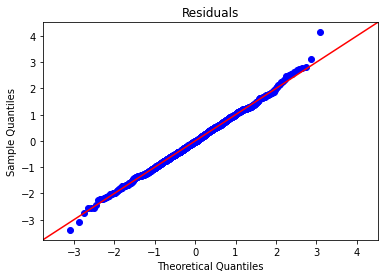

In [78]:
plot_lm_diag(fitted_gamma)

The assumptions here holds as the noise were slightly evenly distributed(slightly funnel-shaped) and as such approximately homoskedastic;the QQplot is slightly normal and i think the assumptions hold here.

### Does the linear regression seem appropriate to the data?

 It does not seem appropriate to the data as there is no correllation between X and Y and the R-squared does explain just 13% of the variation in the dependent variable

## Multiple Regression:
Here, we are doing multiple regression to see how well it fits our data. x1 and x2 are generated from multiviriate normal  and y is from a linear model.

In [79]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
xs = rng.multivariate_normal([10, -2], [[4, 0], [0, 25]], 1000)
# turn into a data frame
xdf = pd.DataFrame(xs, columns=['X1', 'X2'])
x1=np.array(xdf['X1'])
x2=np.array(xdf['X2'])
errs_mt= rng.standard_normal(1000)
ys5 = 1 + 0.5 * x1 + 3*x2 + errs_mt
datamt = pd.DataFrame({
    'X1': x1,
    'X2':x2,
    'Y': ys5
})
datamt

,X1,X2,Y
0,11.424338,-1.775142,-0.177266
1,9.751669,0.062137,6.674038
2,11.189584,-8.114852,-18.632878
3,9.876002,-0.737390,4.185064
4,8.604557,-6.144546,-11.824848
...,...,...,...
995,8.959803,3.867158,18.058905
996,11.410096,3.351759,16.377139
997,7.219925,10.939249,38.668080
998,11.819523,12.079893,43.629239


Fitting the model:


In [80]:
multi_mod = smf.ols('Y ~ X1 + X2', data=datamt)
multif = multi_mod.fit()
multif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.134e+05
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:55:38   Log-Likelihood:                -1448.3
No. Observations:                1000   AIC:                             2903.
Df Residuals:                     997   BIC:                             2917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8723      0.173      5.038      0.000       0.533       1.212
X1             0.5125      0.017     30.298      0.000       0.479       0.546
X2             2.9988      0.006    475.291      0.000       2.986       3.011
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.934
Skew:                           0.087   Prob(JB):                        0.380
Kurtosis:                       3.126   Cond. No.                         55.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 The intercept is 0.8723, the coefficients are X1=0.5125 and X2=2.9988; as expected the coefficients are approx what they are in the equation and the intercept of 1 increased the R-squared to 0.996-explaining 99.6% of the variance in the dependent variable implying partially that the model fits well.

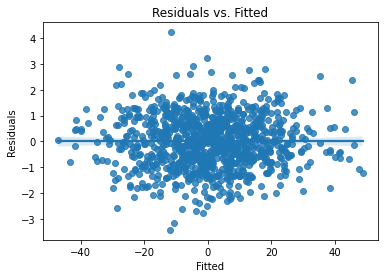

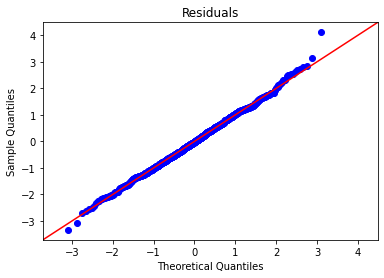

In [81]:
plot_lm_diag(multif)

The assumptions here holds. The Residuals vs Fitted plot have  evenly distributed variance while the QQplot shows the points align except for one or two outliers,overall, the assumptions hold.

..

## Correlated Predictors:
In this section, we are generating our x from multivirate normal and y from a linear equation.
We want to see how well the data will confirm the reliability of the analytical values.

In [82]:
xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)
xdf1 = pd.DataFrame(xs, columns=['X1', 'X2'])
x1_cp=np.array(xdf1['X1'])
x2_cp=np.array(xdf1['X2'])
errs_cp= rng.normal(0,2,1000)
yscp = 3 + 2 * x1_cp+ 3*x2_cp + errs_cp
datacp = pd.DataFrame({
    'X1': x1_cp,
    'X2':x2_cp,
    'Y': yscp
})
datacp

,X1,X2,Y
0,1.226228,3.706306,16.755739
1,3.113876,4.257833,24.266347
2,1.459454,3.688119,17.117485
3,1.944344,4.337819,16.413286
4,2.423394,4.260764,19.351144
...,...,...,...
995,0.473935,2.952296,11.605755
996,1.913888,4.354084,19.351838
997,1.489449,3.993145,18.481446
998,2.320999,4.414067,22.337200


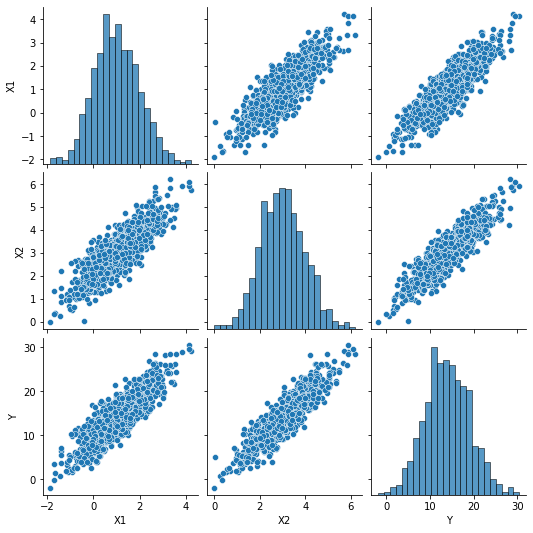

In [83]:
sns.pairplot(datacp)

Their relationships are strongly correllated and their distributions look normally distributed.

Fitting the model:

In [84]:
multi_cp = smf.ols('Y ~ X1 + X2', data=datacp)
multicp= multi_cp.fit()
multicp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2864.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:55:41   Log-Likelihood:                -2101.3
No. Observations:                1000   AIC:                             4209.
Df Residuals:                     997   BIC:                             4223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7155      0.273      9.935      0.000       2.179       3.252
X1             1.9493      0.120     16.271      0.000       1.714       2.184
X2             3.0974      0.120     25.869      0.000       2.862       3.332
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                1.007
Skew:                           0.067   Prob(JB):                        0.604
Kurtosis:                       3.080   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model fits well as the variables show a positive linear relationship, which is pretty obvious from the pairplot and the significance of the other coefficients. 

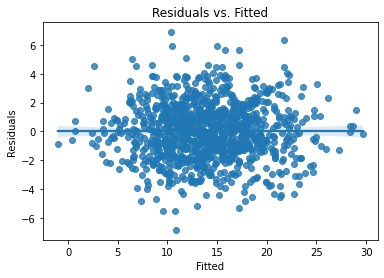

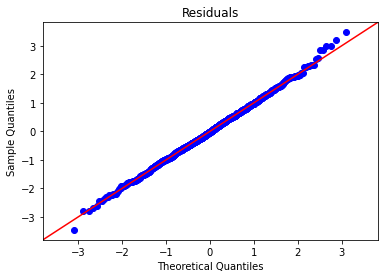

In [85]:
plot_lm_diag(multicp)

From the Fitted vs Normal, there are some scattered points, but it is approximately homoskedastic and the QQplots, the assumptions hold.The model aligns on the line in the QQplot, and the Fitted vs Residual also did not violate the assumptions as well not minding the few points that seem not to follow the pattern,statistics is not about precision but approximation.

Let us repeat the simualtion with 100 samples over a thousand iterations.We are computing the intercept,slope of x1 and slope of x2 respectively.

In [86]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=1000

interc=np.empty(ITE_COUNT)
slopeX1=np.empty(ITE_COUNT)
slopeX2=np.empty(ITE_COUNT)

for i in range(ITE_COUNT):
    xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 100)
    xdf1 = pd.DataFrame(xs, columns=['X1', 'X2'])
    x1_cp=np.array(xdf1['X1'])
    x2_cp=np.array(xdf1['X2'])
    errs_cp= rng.normal(0,2,100)
    yscp = 3 + 2 * x1_cp+ 3*x2_cp + errs_cp
    datacp = pd.DataFrame({
    'X1': x1_cp,
    'X2':x2_cp,
    'Y': yscp
    })
    multi_mod= smf.ols('Y ~ X1 + X2', data=datacp)     
    multif=multi_mod.fit()
    interc[i]=multif.params['Intercept']
    slopeX1[i]=multif.params['X1']
    slopeX2[i]=multif.params['X2']

In [87]:


mean_int=interc.mean()
var_int =interc.var()
mean_slopeX1=slopeX1.mean()
var_slopeX1=slopeX1.var()
mean_slopeX2=slopeX2.mean()
var_slopeX2=slopeX2.var()




In [88]:
print('mean and variance of intercept are :')
print(mean_int,var_int)

mean and variance of intercept are :
3.009595777805718 0.7468929556341773


The mean is exactly what we expect from the experiment, even the variance as they are very close to the actual analytical values of the equation.

In [89]:
print('mean and variance of X1 coefficients are :')
print(mean_slopeX1,var_slopeX1)
print('mean and variance of X2 coefficients are :')
print(mean_slopeX2,var_slopeX2)

mean and variance of X1 coefficients are :
1.9967616646680804 0.14236029986088627
mean and variance of X2 coefficients are :
2.9974235364603157 0.14370428476458122


The mean 1.9967.. is approximatly equal to the actual value in the equation,and the variance-0.1423..for x1 and mean of 2.9974.. and variance of 0.1423.. also depicts significance of the the simulation results. 

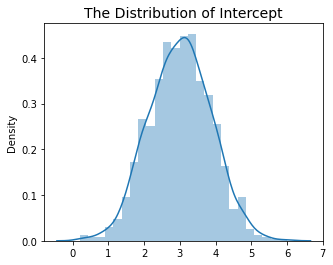

In [90]:
plt.figure(figsize=(5,4))
sns.distplot(x=interc)
plt.title('The Distribution of Intercept',fontsize=14)
plt.show()

The distribution of the intercept looks normally distributed

Text(0.5, 1.0, 'The Distribution of SlopeX1')

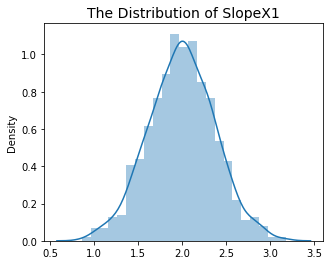

In [91]:
plt.figure(figsize=(5,4))
#plt.title('The Distribution of SlopeX1',fontsize=14)
sns.distplot(slopeX1)
plt.title('The Distribution of SlopeX1',fontsize=14)


The distribution of X1 looks normally distributed

Text(0.5, 1.0, 'The Distribution of SlopeX2')

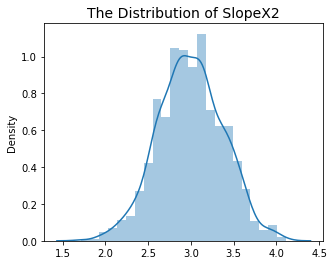

In [92]:
plt.figure(figsize=(5,4))
sns.distplot(slopeX2)
plt.title('The Distribution of SlopeX2',fontsize=14)

The distribution of X2 looks normally distributed

In [93]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=100
Cv_list=[0,0.1,0.2,0.5,0.9,0.99,0.999]
intercR=np.empty(ITE_COUNT)
slopeR1=np.empty(ITE_COUNT)
slopeR2=np.empty(ITE_COUNT)
var_intercR=np.empty(len(Cv_list))
var_slopeR1=np.empty(len(Cv_list))
var_slopeR2=np.empty(len(Cv_list))
for j in range(len(Cv_list)):
    for i in range(ITE_COUNT):
        xsR = rng.multivariate_normal([1, 3], [[1, Cv_list[j]], [Cv_list[j], 1]], 1000)
        xs_corp1=np.array([x[0]for x in xsR])
        xs1_corp1 =np.array([x[1]for x in xsR])
        errs_R = rng.normal(0,2,1000)
        yscp_R = 3 + 2 * xs_corp1+ 3*xs1_corp1 + errs_R
        datacpR = pd.DataFrame({
        'X1': xs_corp1,
        'X2':xs1_corp1,
        'Y': yscp_R
        })
        multi_modR= smf.ols('Y ~ X1 + X2', data=datacpR)     
        multif_R=multi_modR.fit()
        intercR[i]=multif_R.params['Intercept']
        slopeX1[i]=multif_R.params['X1']
        slopeX2[i]=multif_R.params['X2']
    var_intercR[j]=intercR.var()
    var_slopeR1[j]=slopeX1.var()
    var_slopeR2[j]=slopeX2.var()
    
    

    



<AxesSubplot:>

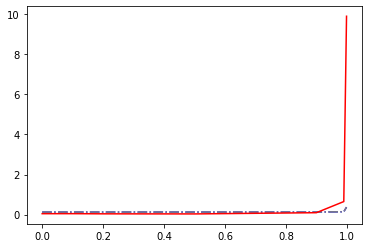

In [94]:
sns.lineplot(x=Cv_list,y=var_slopeR1,color='blue',linestyle='dashdot')
sns.lineplot(x=Cv_list,y=var_slopeR2,color= '0.5',linestyle='dashdot')
sns.lineplot(x=Cv_list,y=var_intercR,color='red',linestyle='solid')

This graph shows that the coefficients are at zero till 0.9 when they peaked to 0.2 , and at 0.999 they all went up due to the fact that point the covariance is almost equal to 1, a point where there is a perfect correlation between the predictor variables.

In [95]:
rng= seedbank.numpy_rng()
seedbank.initialize(20211015)
ITE_COUNT=100
Cv_list=[0,0.1,0.2,0.5,0.9,0.99,0.999,1]
intercR=np.empty(ITE_COUNT)
slopeR1=np.empty(ITE_COUNT)
slopeR2=np.empty(ITE_COUNT)
var_intercR=np.empty(len(Cv_list))
var_slopeR1=np.empty(len(Cv_list))
var_slopeR2=np.empty(len(Cv_list))
for j in range(len(Cv_list)):
    for i in range(ITE_COUNT):
        xsR = rng.multivariate_normal([1, 3], [[1, Cv_list[j]], [Cv_list[j], 1]], 1000)
        xs_corp1=np.array([x[0]for x in xsR])
        xs1_corp1 =np.array([x[1]for x in xsR])
        errs_R = rng.normal(0,2,1000)
        yscp_R = 3 + 2 * xs_corp1+ 3*xs1_corp1 + errs_R
        datacpR = pd.DataFrame({
        'X1': xs_corp1,
        'X2':xs1_corp1,
        'Y': yscp_R
        })
        multi_modR= smf.ols('Y ~ X1 + X2', data=datacpR)     
        multif_R=multi_modR.fit()
        intercR[i]=multif_R.params['Intercept']
        slopeX1[i]=multif_R.params['X1']
        slopeX2[i]=multif_R.params['X2']
    var_intercR[j]=intercR.var()
    var_slopeR1[j]=slopeX1.var()
    var_slopeR2[j]=slopeX2.var()
    

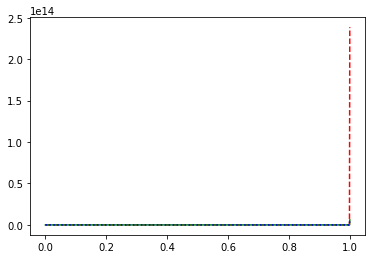

In [96]:
sns.lineplot(x=Cv_list,y=var_intercR,color='red',linestyle='dashed')
sns.lineplot(x=Cv_list,y=var_slopeR1,color='green',linestyle='solid')
sns.lineplot(x=Cv_list,y=var_slopeR2,color='blue',linestyle='dotted')
#plt.xlim(1.2,0.0)
#plt.ylim(3.0,0.0)
plt.show()

As the covariance increases from 0.0 to 0.999, the regression parameters remained same till it hits 1, it now rose to 2.4, this is due to the perfect correlation between the predictor variables.

## Reflection

- What i learnt from this assignment is the essence of simulation: trying to leverage the numpy random number generator to generate random numbers and use them to study the behavior of statistical techniques on the randomly generated data. Assuming getting the data for the experiment is costly or is delicate and requires one to be very meticulous, simulation is the way to go, so you know the likely outcomes before going live with the real data.

- Second, i learnt how the data/statistical techniques behave in certain conditions,for instance, where some model parameters are tweaked; increasing the slope and the intercept could give rise to a bigger R-squared. Also, when the value of covariance is 1, the effect on the variance, in a perfect correlation condition.Consequently, when i know the model parameters and the expected behaviors,this gives me insight into knowing the behaviors of model parameters i do not know and  how they are likely to behave judging from how the simulated one behaved.

- I also learnt about the relationship between the coefficients, intercepts and R-Squared and how they affect the outcome of a model.I learnt also how increasing the drawn sample and the iterations confirms or makes a result more clearly in terms of the behavior of the variables involved.